<div style="
    background: linear-gradient(90deg,rgb(251, 255, 10), #ff758c, #ff4d6d);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    font-size: 20px;
    font-weight: bold;
    text-align: center;">
   Image Classification using Deep Learning Learing Based Algorithms
</div>



<div style="
    background: linear-gradient(90deg,rgb(251, 255, 10), #ff758c, #ff4d6d);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    font-size: 17px;
    font-weight: bold;
    text-align: center;">
    Import Libraries
    <br/>
-----------------------------------------------------------------------------------------------------------------------------------------
</div>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

import warnings
warnings.filterwarnings("ignore")

<div style="
    background: linear-gradient(90deg,rgb(251, 255, 10), #ff758c, #ff4d6d);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    font-size: 17px;
    font-weight: bold;
    text-align: center;">
    Using ANN
    <br/>
-----------------------------------------------------------------------------------------------------------------------------------------
</div>


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

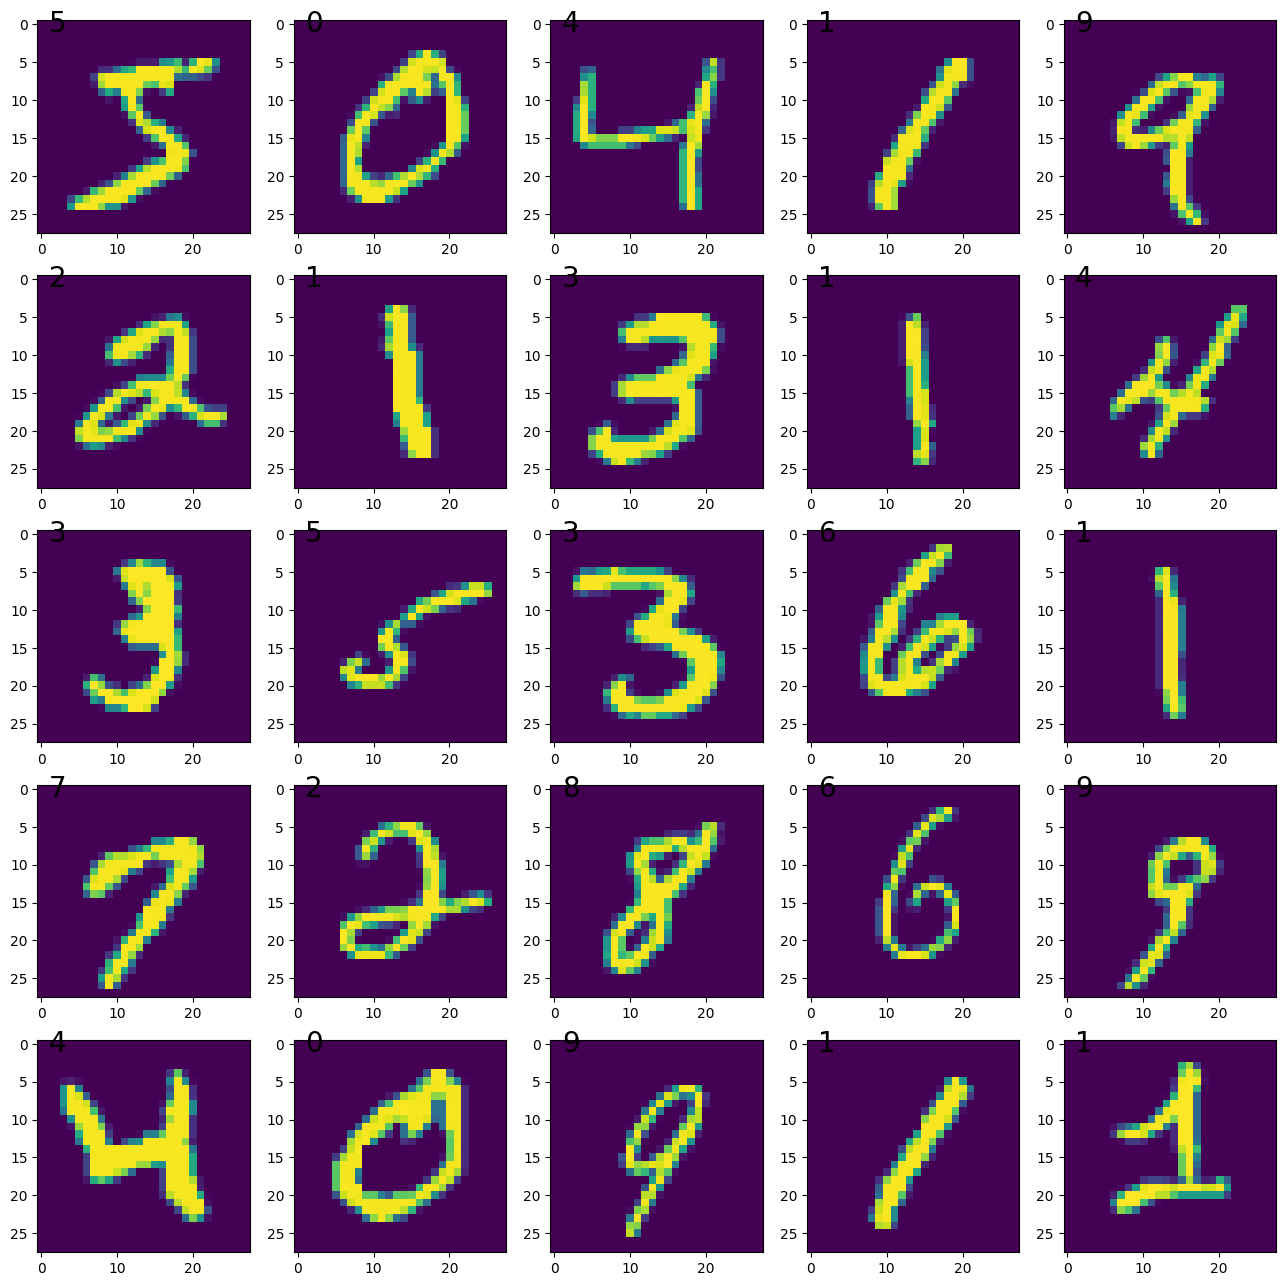

In [4]:
plt.figure(figsize=(16,16))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i])
    plt.text(1, 1, y_train[i], fontsize=20)

plt.show()

In [5]:
X_train = X_train/255
X_test = X_test/255

In [6]:
X_train[0].shape    # 2D Data

(28, 28)

In [7]:
num = X_train[0]

# 3 Methods to convert 2D array to 1D array
np.reshape(num, num.size)
num.reshape(-1)
num.flatten()

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [8]:
X_train = X_train.reshape(-1, X_train[0].size)
X_test = X_test.reshape(-1, X_test[0].size)

In [9]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

<Axes: xlabel='count'>

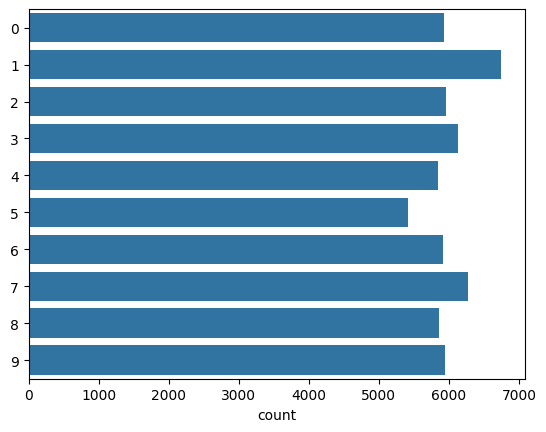

In [10]:
sns.countplot(y=y_train)

In [11]:
y_train_new = to_categorical(y_train)
y_test_new = to_categorical(y_test)

y_train_new.shape, y_test_new.shape

((60000, 10), (10000, 10))

In [12]:
num_input = X_train[0].shape[0]
num_output = y_train_new[0].shape[0]

In [13]:
model = Sequential([
    Input(shape=(num_input,)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(num_output, activation='softmax') # Output layer
])

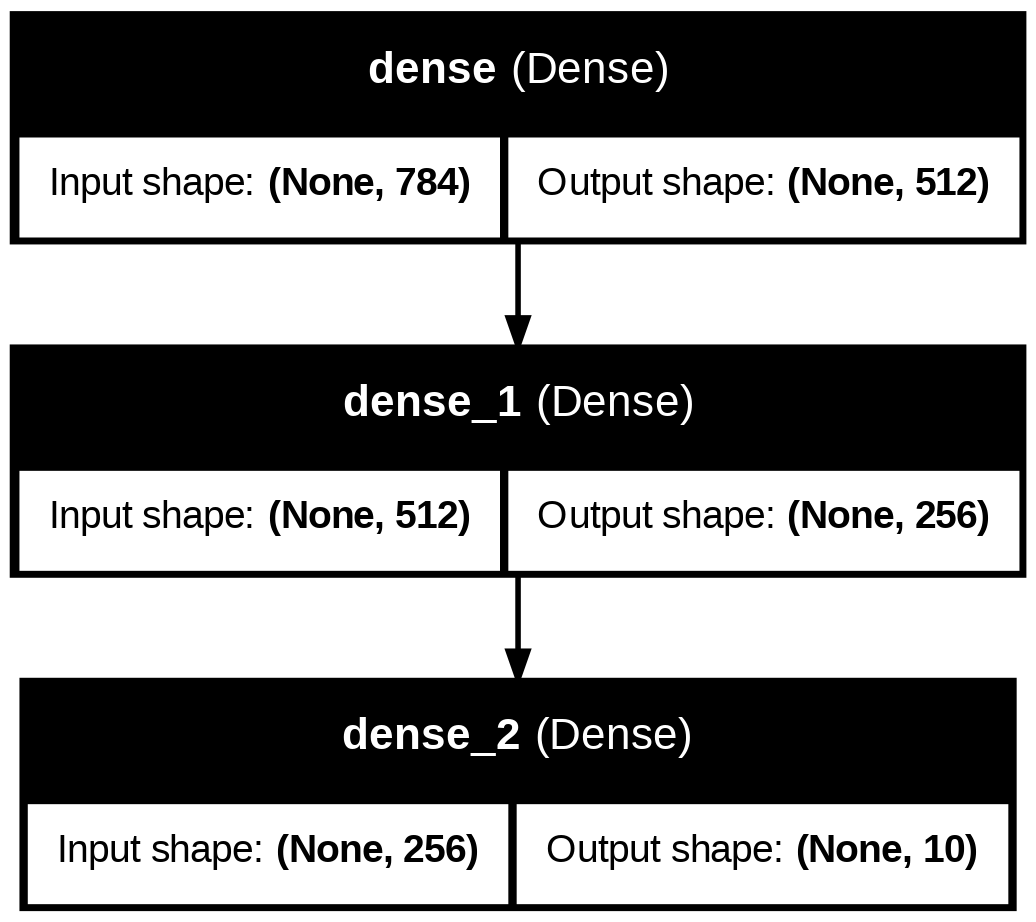

In [14]:
from keras.utils import plot_model
plot_model(
    model,
    show_shapes=True,
    show_layer_names=True
)

In [15]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [16]:
history = model.fit(
    X_train,
    y_train_new,
    batch_size=10,
    epochs=10,
)

Epoch 1/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9102 - loss: 0.2936
Epoch 2/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9717 - loss: 0.0899
Epoch 3/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9808 - loss: 0.0625
Epoch 4/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9851 - loss: 0.0482
Epoch 5/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9874 - loss: 0.0420
Epoch 6/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9903 - loss: 0.0334
Epoch 7/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9914 - loss: 0.0314
Epoch 8/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9921 - loss: 0.0272
Epoch 9/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9919 - loss: 0.0288
Epoch 10/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9930 - loss: 0.0236


In [17]:
model.evaluate(X_test, y_test_new)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9745 - loss: 0.1764


[0.15661504864692688, 0.9768000245094299]

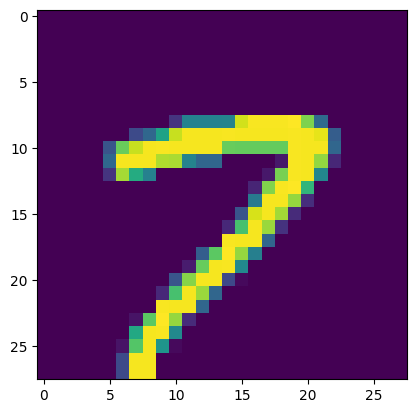

In [18]:
new = X_train[123]
plt.imshow(new.reshape(28,28))

In [19]:
np.argmax(model.predict(new.reshape(1,784)))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


7

In [20]:
import cv2
from skimage import io


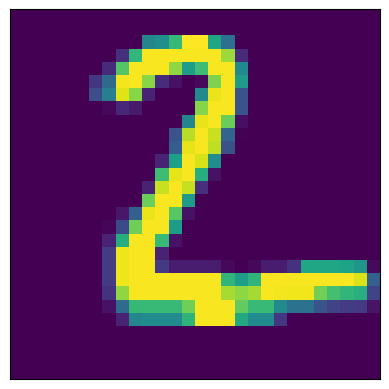

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


2

In [21]:
img = io.imread('/content/new-char.png', as_gray=True)
resized_image = cv2.resize(img, (28,28))
plt.xticks([])
plt.yticks([])
plt.imshow(resized_image)
plt.show()
np.argmax(model.predict(resized_image.reshape(1,784)))

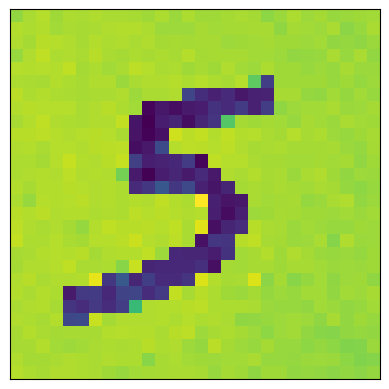

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


7

In [22]:
img = io.imread('/content/new-char1.jpg', as_gray=True)
resized_image = cv2.resize(img, (28,28))
plt.xticks([])
plt.yticks([])
plt.imshow(resized_image)
plt.show()
np.argmax(model.predict(resized_image.reshape(1,784)))

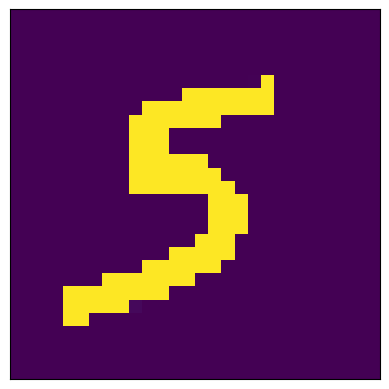

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


5

In [24]:
char  = cv2.imread('/content/new-char1.jpg', 0)

thresh, new_char = cv2.threshold(char, 127, 255, cv2.THRESH_BINARY_INV )
new_char = cv2.resize(new_char, (28, 28))

plt.xticks([])
plt.yticks([])
plt.imshow(new_char)
plt.show()
np.argmax(model.predict(new_char.reshape(1,784)))

<div style="
    background: linear-gradient(90deg,rgb(251, 255, 10), #ff758c, #ff4d6d);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    font-size: 17px;
    font-weight: bold;
    text-align: center;">
    Using CNN
    <br/>
-----------------------------------------------------------------------------------------------------------------------------------------
</div>


In [42]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [43]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [44]:
X_train = X_train/255
X_test = X_test/255

In [45]:
X_train[0].shape    # 2D Data

(28, 28)

In [46]:
model = Sequential()

# Input Layer
model.add(Input(shape=(28,28,1)))

# Convlution and Pooling Layers
model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=16,
                 kernel_size=(3,3),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=256,
                activation='relu'))

# Hidden Layer
model.add(Dense(units=256,
                activation='relu'))

# Output Layer
model.add(Dense(units=10,
                activation='softmax'))

In [47]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [48]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 11, 11, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │         102,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 175,962 (687.35 KB)

 Trainable params: 175,962 (687.35 KB)

 Non-trainable params: 0 (0.00 B)

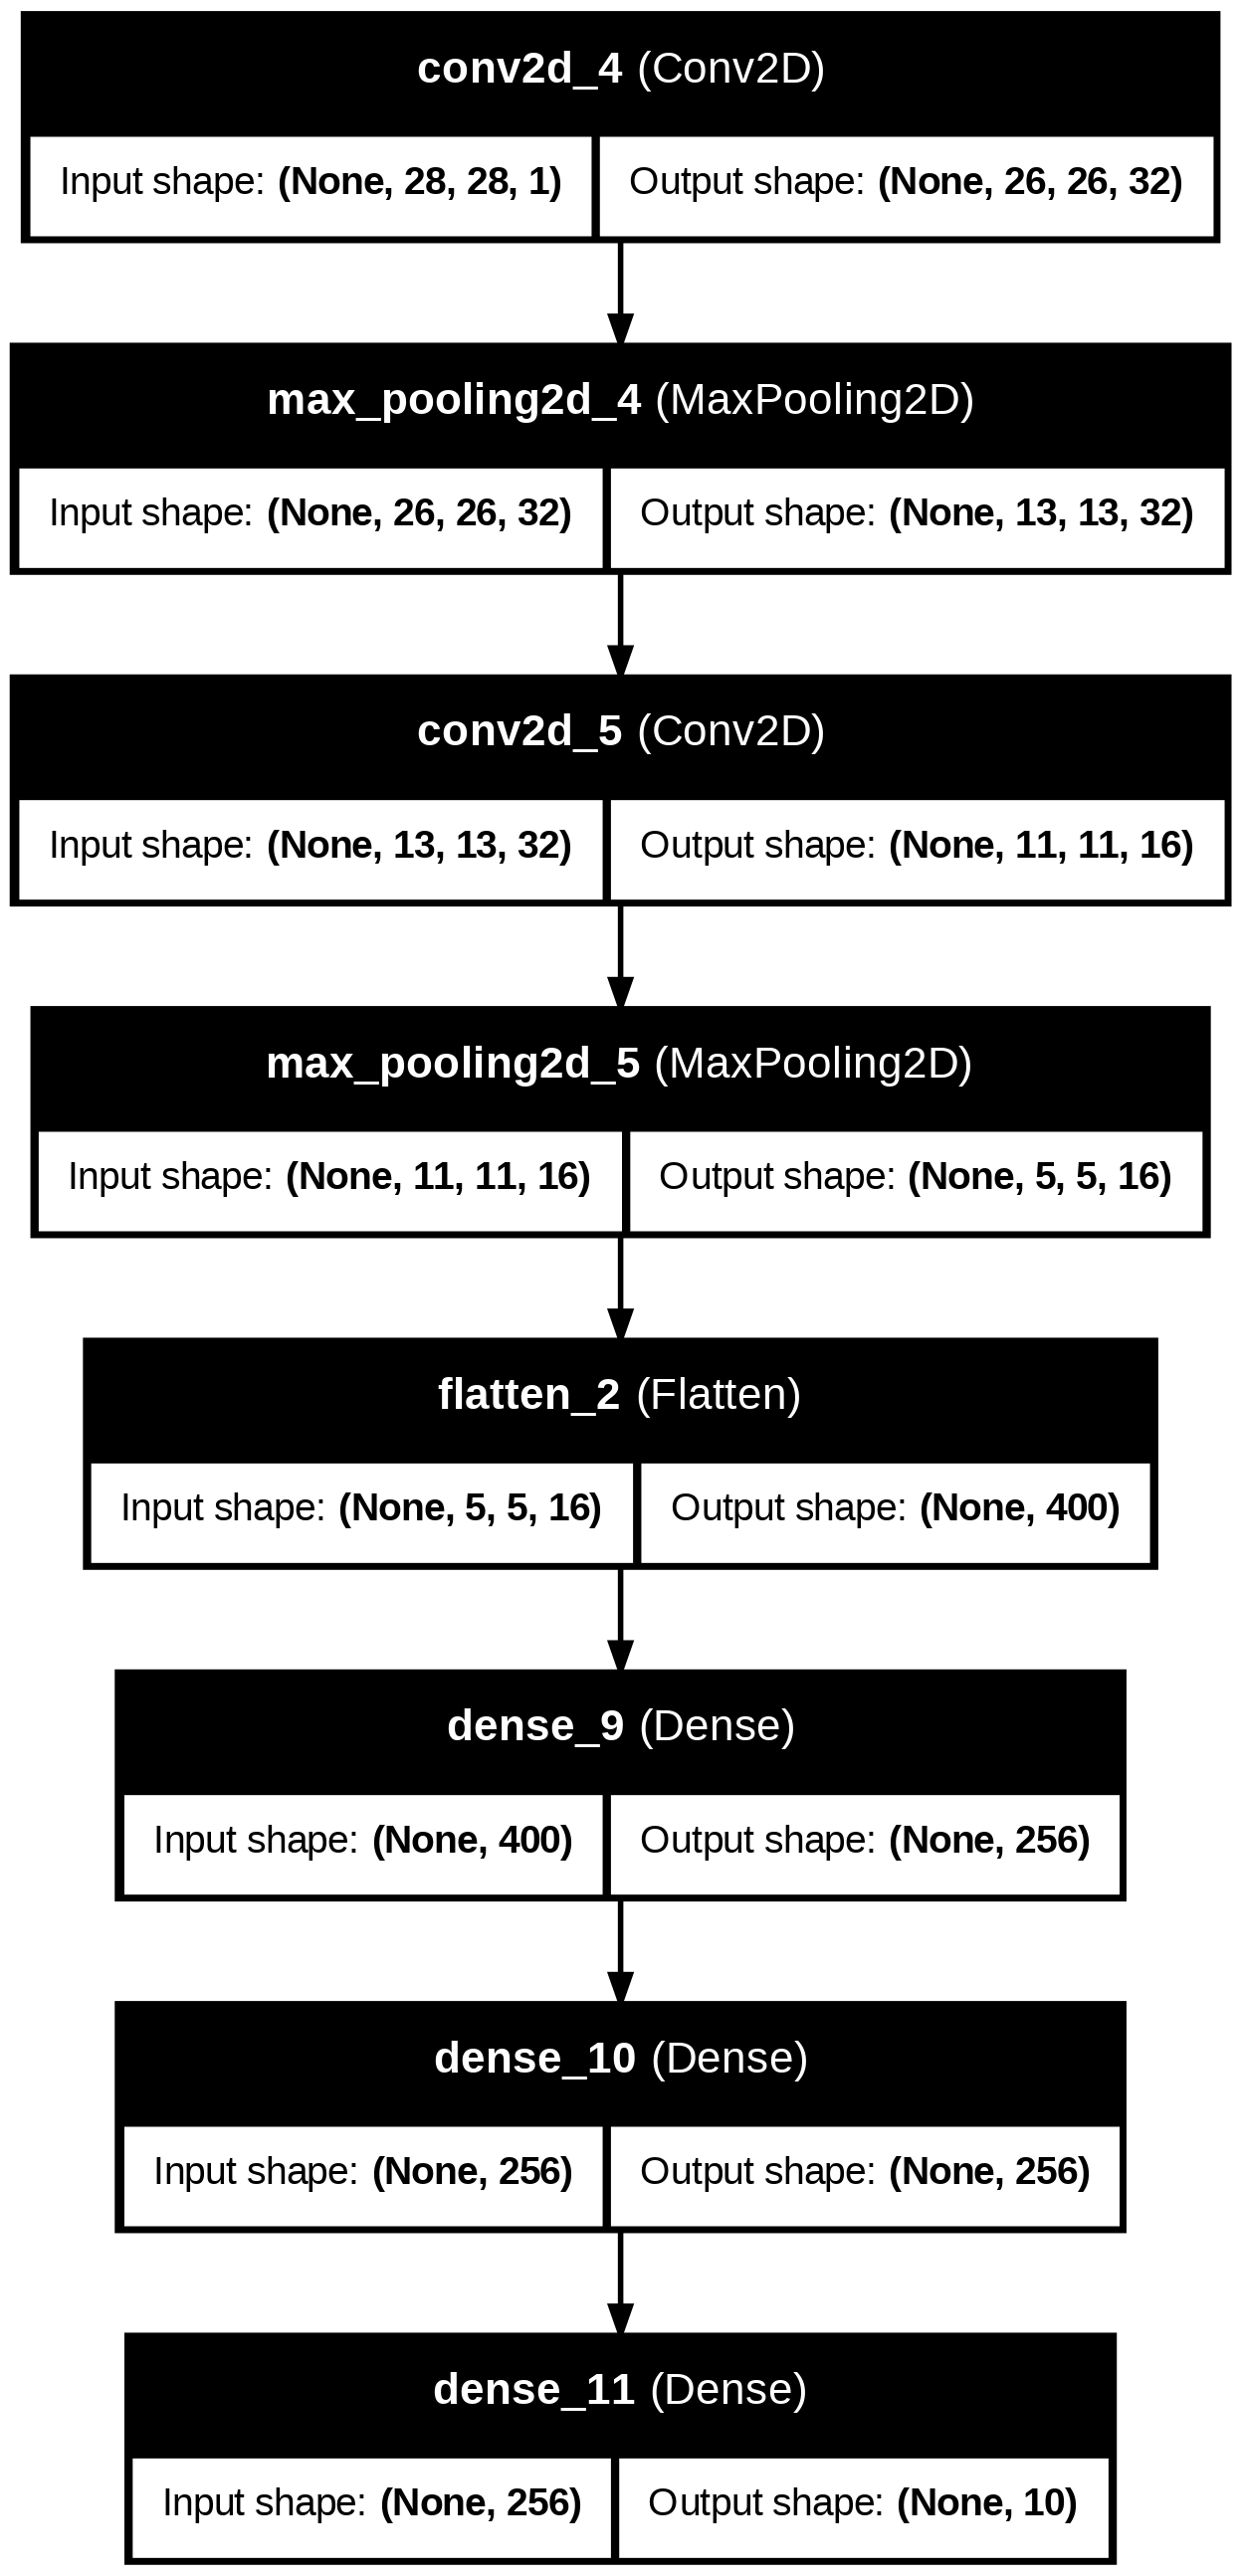

In [49]:
from keras.utils import plot_model

plot_model(
    model,
    show_shapes=True,
    show_layer_names=True
)

In [50]:
model.fit(
    X_train,
    y_train,
    batch_size=10,
    epochs=10,
)

Epoch 1/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9197 - loss: 0.2482
Epoch 2/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9843 - loss: 0.0497
Epoch 3/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9886 - loss: 0.0366
Epoch 4/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9919 - loss: 0.0269
Epoch 5/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9929 - loss: 0.0227
Epoch 6/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9938 - loss: 0.0206
Epoch 7/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9952 - loss: 0.0161
Epoch 8/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9953 - loss: 0.0148
Epoch 9/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9959 - loss: 0.0144
Epoch 10/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9966 - loss: 0.0120


In [35]:
model.evaluate(X_test, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1330 - loss: 2.3026


[2.3025708198547363, 0.12970000505447388]

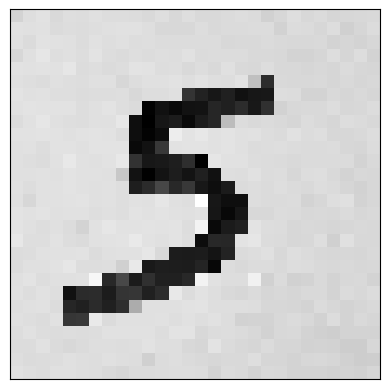

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


5

In [51]:
img = cv2.imread('/content/new-char1.jpg', 0)

img_new = cv2.resize(img, (28,28))
plt.xticks([])
plt.yticks([])
plt.imshow(img_new, cmap='gray')
plt.show()
np.argmax(model.predict(img_new.reshape(1,28,28,1)))

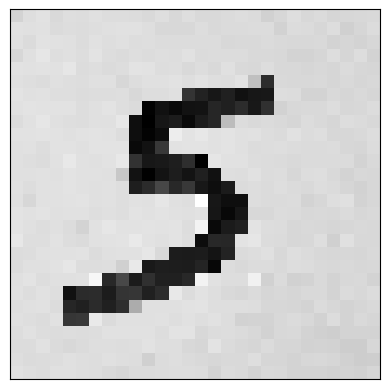

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


5

In [52]:
img = cv2.imread('/content/new-char1.jpg', 0)

img_new = cv2.resize(img, (28,28))
plt.xticks([])
plt.yticks([])
plt.imshow(img_new, cmap='gray')
plt.show()
np.argmax(model.predict(img_new.reshape(1,28,28,1)))